In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# dataset load
file_path = 'vgsales.csv'
df = pd.read_csv(file_path)

# basic info
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


(None,
    Rank                      Name Platform    Year         Genre Publisher  \
 0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
 1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
 2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
 3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
 4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   
 
    NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
 0     41.49     29.02      3.77         8.46         82.74  
 1     29.08      3.58      6.81         0.77         40.24  
 2     15.85     12.88      3.79         3.31         35.82  
 3     15.75     11.01      3.28         2.96         33.00  
 4     11.27      8.89     10.22         1.00         31.37  )

In [22]:
# Handling missing values

# fill them
df["Year"].fillna(df["Year"].median())
df["Publisher"].fillna("Unknown")

# verify no missing values remain
miss_val = df.isnull().sum()
miss_val

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
ltv               0
dtype: int64

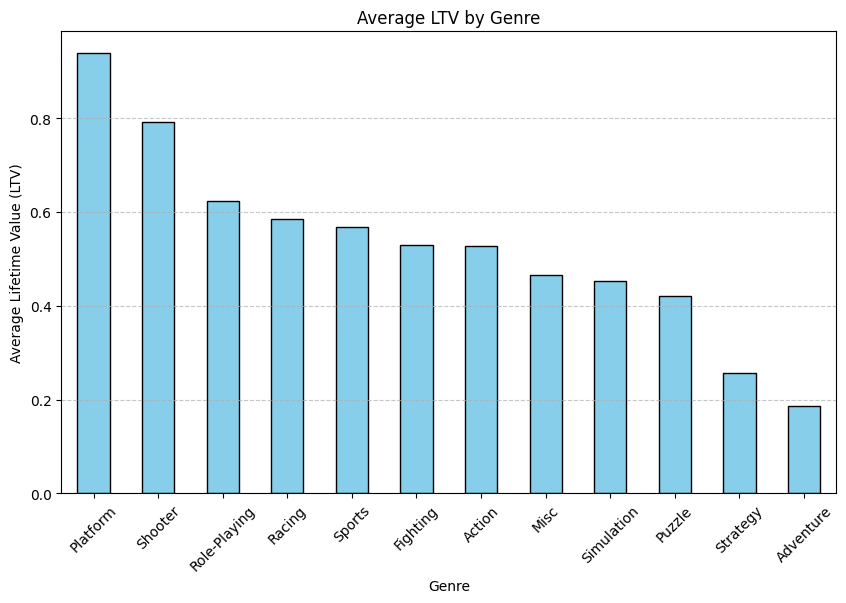

In [23]:
# Calculating LTV
df["ltv"] = df["Global_Sales"] 
# average ltv
ltv_by_genre = df.groupby("Genre")["ltv"].mean().sort_values(ascending=False)
# plot the data
plt.figure(figsize=(10, 6))
ltv_by_genre.plot(kind="bar", color="skyblue", edgecolor="black")

#labels & title
plt.xlabel("Genre")
plt.ylabel("Average Lifetime Value (LTV)")
plt.title("Average LTV by Genre")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [27]:
top_5_games = df.nlargest(5, "Global_Sales")[["Name", "Platform", "Global_Sales"]]
print(top_5_games)


                       Name Platform  Global_Sales
0                Wii Sports      Wii         82.74
1         Super Mario Bros.      NES         40.24
2            Mario Kart Wii      Wii         35.82
3         Wii Sports Resort      Wii         33.00
4  Pokemon Red/Pokemon Blue       GB         31.37


In [28]:
top_genres = df.groupby("Genre")["Global_Sales"].sum().sort_values(ascending=False).head(5)
print(top_genres)

Genre
Action          1751.18
Sports          1330.93
Shooter         1037.37
Role-Playing     927.37
Platform         831.37
Name: Global_Sales, dtype: float64


In [29]:
top_platforms = df["Platform"].value_counts().head(5)
print(top_platforms)

Platform
DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
Name: count, dtype: int64


In [30]:
top_years = df.groupby("Year")["Global_Sales"].sum().sort_values(ascending=False).head(5)
print(top_years)

Year
2008.0    678.90
2009.0    667.30
2007.0    611.13
2010.0    600.45
2006.0    521.04
Name: Global_Sales, dtype: float64


In [31]:
avg_sales_per_platform = df.groupby("Platform")["Global_Sales"].mean().sort_values(ascending=False).head(5)
print(avg_sales_per_platform)

Platform
GB      2.606633
NES     2.561939
GEN     1.050370
SNES    0.837029
PS4     0.827679
Name: Global_Sales, dtype: float64
